## Final Project Submission

Please fill out:
* Student name: Muthuri Abigail Mwendwa
* Student pace: Full time
* Scheduled project review date/time: June 7th
* Instructor name: Maryann Mwikali

## DATA UNDERSTANDING & CLEANING

**Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

### Read dataset

In [2]:
df = pd.read_csv("car_insurance_claim.csv")
df.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


In [3]:
df.shape

(10302, 27)

- The dataset has 10,302 rows and 27 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

- My dataset contains 3 data types : int, float, object
- There are missing values in six columns 

In [5]:

# Describe the columns
column_names = [
    "ID", "KIDSDRIV", "BIRTH", "AGE", "HOMEKIDS", "YOJ", "INCOME", 
    "PARENT1", "HOME_VAL", "MSTATUS", "GENDER", "EDUCATION", 
    "OCCUPATION", "TRAVTIME", "CAR_USE", "BLUEBOOK", "TIF", "CAR_TYPE", 
    "RED_CAR", "OLDCLAIM", "CLM_FREQ", "REVOKED", "MVR_PTS", "CLM_AMT", 
    "CAR_AGE", "CLAIM_FLAG", "URBANICITY"
]

column_descriptions = [
    "Unique identifier for each customer.", "Number of kids the customer has who are of driving age.", 
    "Date of birth of the customer.", "Age of the customer.", 
    "Number of kids the customer has at home.", "Years on the job (number of years the customer has been employed).", 
    "Income of the customer.", "Indicates whether the customer is a single parent (Yes/No).", 
    "Value of the customer's home.", "Marital status of the customer (Yes/No).", 
    "Gender of the customer (M/F).", "Education level of the customer.", 
    "Occupation of the customer.", "Daily travel time to work.", 
    "Purpose of car usage (Private/Commercial).", "Value of the customer's car.", 
    "Time in force (Years).", "Type of car.", "Indicates whether the customer owns a red car (yes/no).", 
    "Total amount of previous claims.", "Number of claims reported.", 
    "Indicates whether the customer's driver's license has been revoked (Yes/No).", 
    "Number of motor vehicle record points.", "Possible future claims", 
    "Age of the customer's car.", "Indicates whether a claim was filed (1/0).", 
    "Urbanicity type ((Highly Urban/Urban)/(Highly Rural/Rural))."
]

# Create a DataFrame
data = {'Column Name': column_names, 'Description': column_descriptions}
desc_df = pd.DataFrame(data)

desc_df

,Column Name,Description
0,ID,Unique identifier for each customer.
1,KIDSDRIV,Number of kids the customer has who are of dri...
2,BIRTH,Date of birth of the customer.
3,AGE,Age of the customer.
4,HOMEKIDS,Number of kids the customer has at home.
5,YOJ,Years on the job (number of years the customer...
6,INCOME,Income of the customer.
7,PARENT1,Indicates whether the customer is a single par...
8,HOME_VAL,Value of the customer's home.
9,MSTATUS,Marital status of the customer (Yes/No).


### Cleaning Dataset

- Convert income and home value to numeric, removing the dollar sign and commas

In [6]:
df['INCOME'] = df['INCOME'].replace('[\$,]', '', regex=True).astype(float)

In [7]:
df['HOME_VAL'] = df['HOME_VAL'].replace('[\$,]', '', regex=True).astype(float)

- Convert old claim and claim amount to numeric, removing the dollar sign and commas

In [8]:
df['OLDCLAIM'] = df['OLDCLAIM'].replace('[\$,]', '', regex=True).astype(float)

In [9]:
df['CLM_AMT'] = df['CLM_AMT'].replace('[\$,]', '', regex=True).astype(float)

- Check for missing values

In [10]:
df.isna().sum()

ID              0
KIDSDRIV        0
BIRTH           0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

- Drop missing values

In [11]:
df.dropna(inplace = True)

- Check for duplicates

In [12]:
duplicates_with_rows = df[df.duplicated()]
duplicates_with_rows

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
9801,279799481,0,21FEB60,39.0,0,14.0,93077.0,No,244764.0,Yes,...,Minivan,yes,0.0,0,No,0,0.0,1.0,0,z_Highly Rural/ Rural


In [13]:
# Remove Duplicates
df = df.drop_duplicates()

- Check if dataset has any more missing values

In [14]:
df.isna().sum()

ID            0
KIDSDRIV      0
BIRTH         0
AGE           0
HOMEKIDS      0
YOJ           0
INCOME        0
PARENT1       0
HOME_VAL      0
MSTATUS       0
GENDER        0
EDUCATION     0
OCCUPATION    0
TRAVTIME      0
CAR_USE       0
BLUEBOOK      0
TIF           0
CAR_TYPE      0
RED_CAR       0
OLDCLAIM      0
CLM_FREQ      0
REVOKED       0
MVR_PTS       0
CLM_AMT       0
CAR_AGE       0
CLAIM_FLAG    0
URBANICITY    0
dtype: int64

In [15]:
df.shape

(7656, 27)

 - After cleaning, the dataset has 7656 rows and 27 columns

### Descriptive Analysis

In [16]:
df.describe()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
count,7.656000e+03,7656.000000,7656.000000,7656.000000,7656.000000,7656.000000,7656.000000,7656.000000,7656.00000,7656.000000,7656.000000,7656.000000,7656.000000,7656.000000,7656.000000
mean,4.980525e+08,0.172153,44.701280,0.740726,10.452717,57866.680904,150040.141196,33.669279,5.34966,4028.974138,0.790491,1.717999,1480.603710,7.893809,0.268939
std,2.852454e+08,0.511284,8.675964,1.129172,4.170546,43970.879868,124124.677623,15.860688,4.12931,8807.943362,1.151715,2.176838,4431.414106,5.589258,0.443437
min,4.012760e+05,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.00000,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000
25%,2.517047e+08,0.000000,39.000000,0.000000,9.000000,26156.000000,0.000000,23.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,4.989455e+08,0.000000,45.000000,0.000000,11.000000,51168.500000,158706.500000,33.000000,4.00000,0.000000,0.000000,1.000000,0.000000,8.000000,0.000000
75%,7.406986e+08,0.000000,51.000000,1.000000,13.000000,81011.500000,232933.000000,44.000000,7.00000,4600.000000,2.000000,3.000000,1157.250000,12.000000,1.000000
max,9.999264e+08,4.000000,81.000000,5.000000,23.000000,367030.000000,885282.000000,142.000000,25.00000,57037.000000,5.000000,13.000000,85524.000000,28.000000,1.000000


### Exploratory Data Analysis

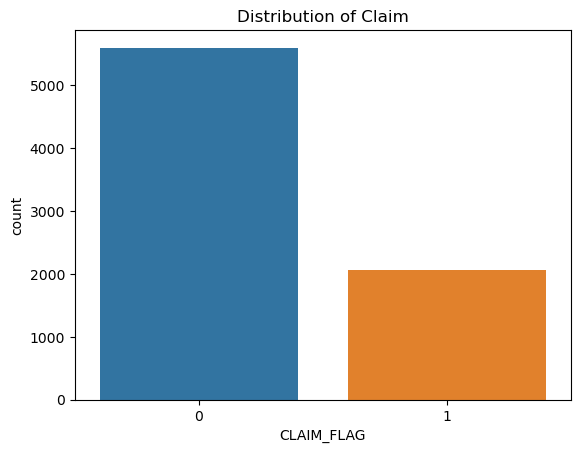

In [17]:
sns.countplot(data=df, x='CLAIM_FLAG')
plt.title('Distribution of Claim')
plt.show()

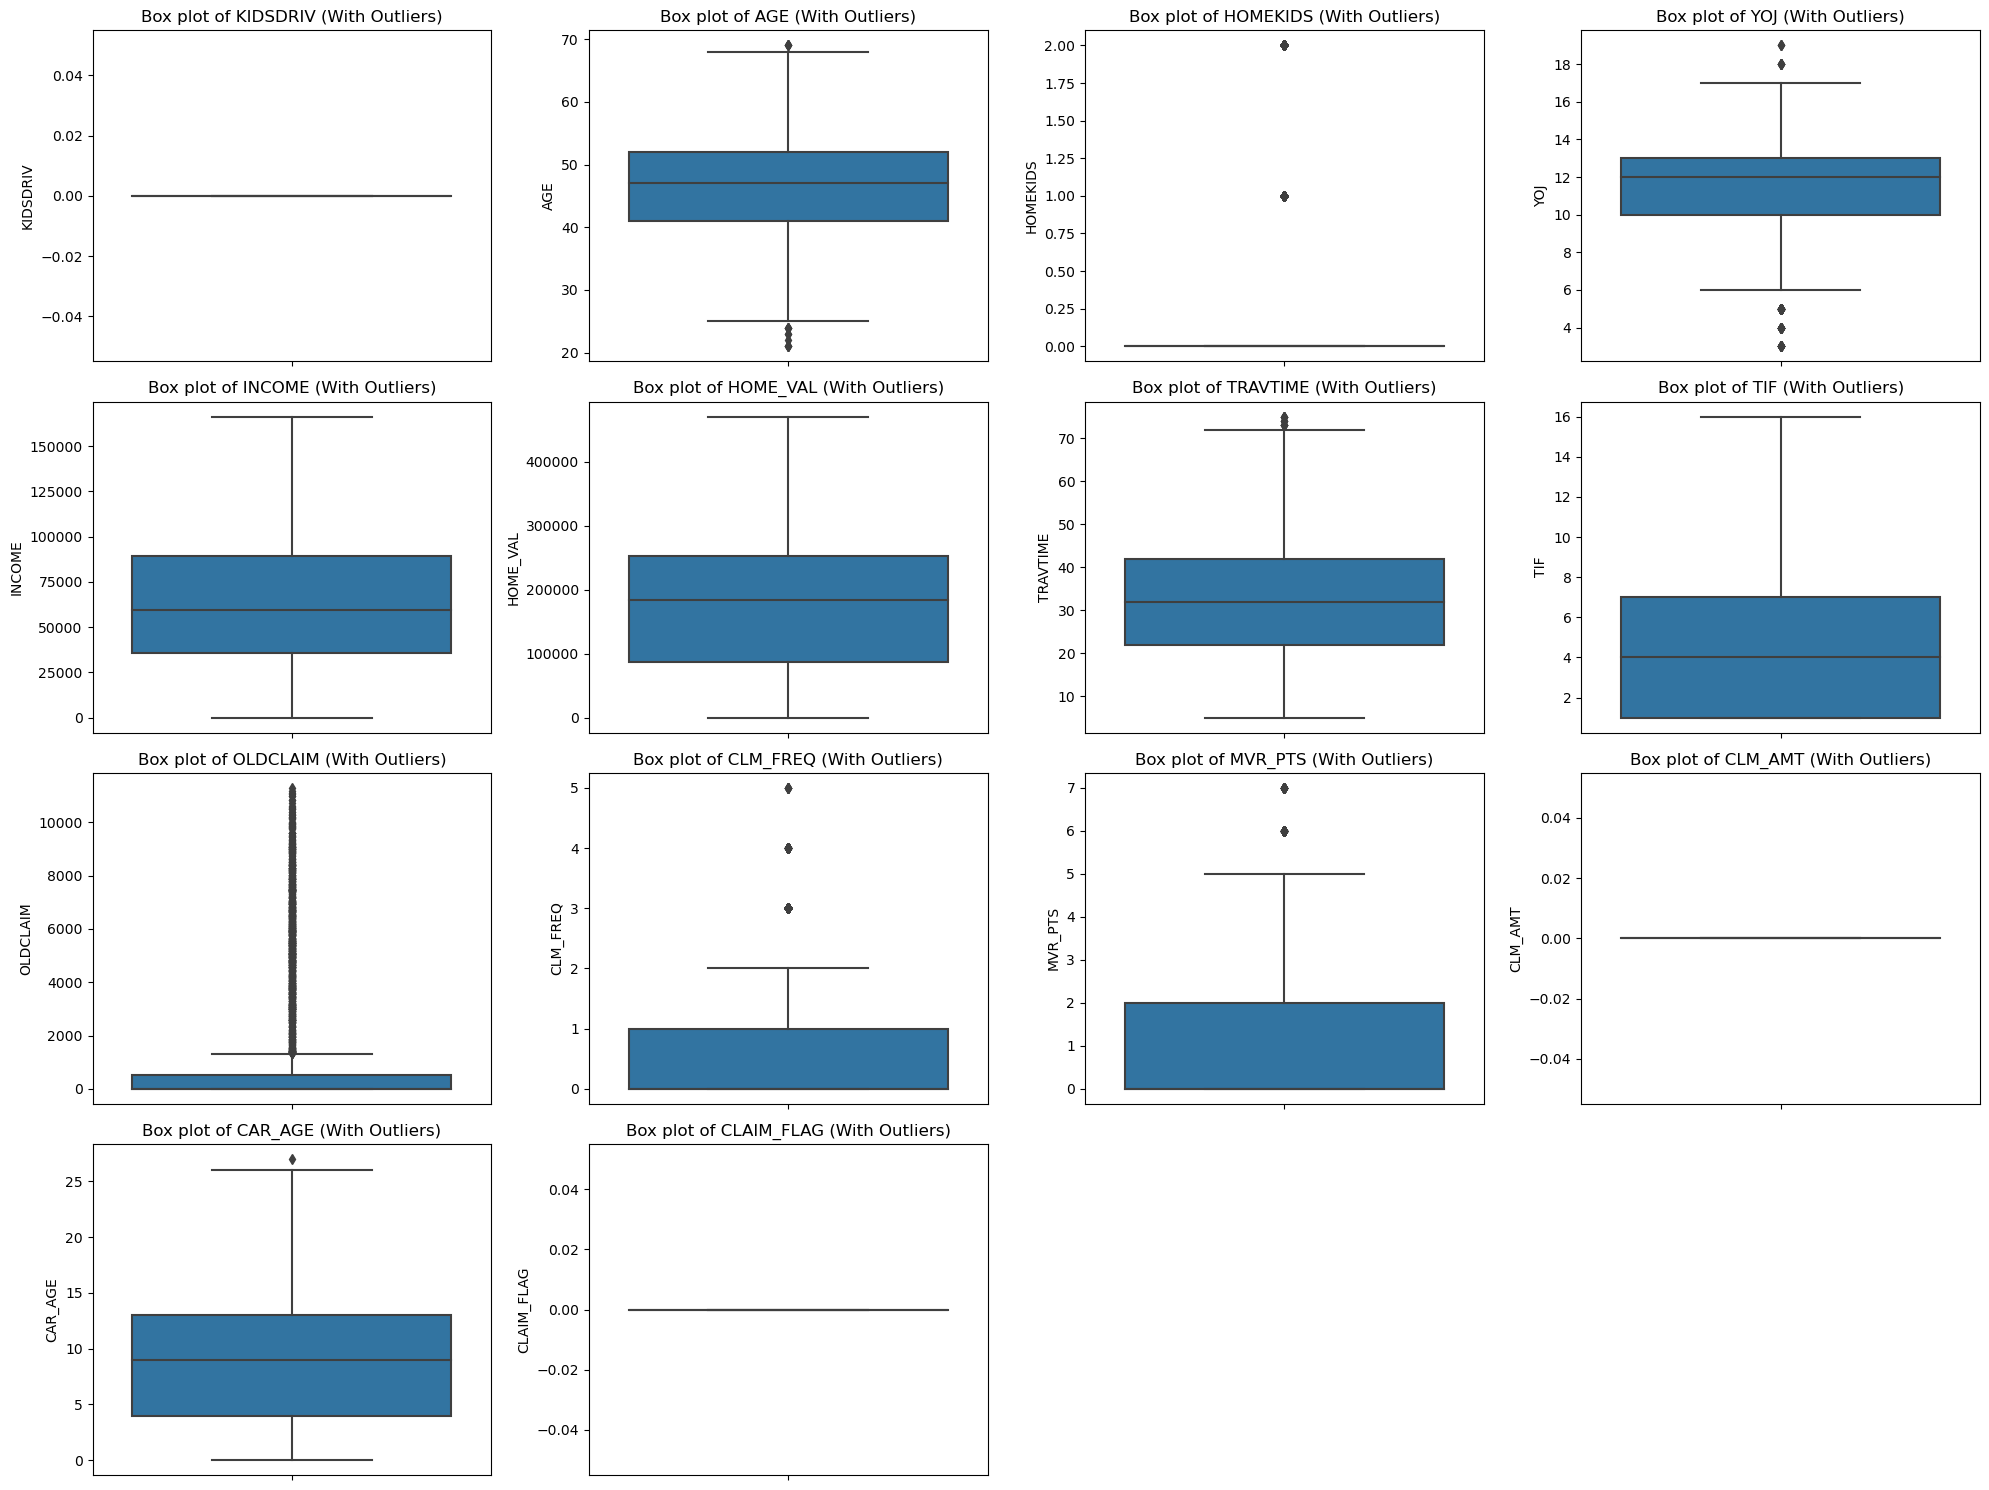

In [39]:
# List of numerical features to check for outliers

def plot_boxplots_with_outliers(data, numerical_columns):
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(numerical_columns, 1):
        plt.subplot(4, 4, i)
        sns.boxplot(data=data, y=col)
        plt.title(f'Box plot of {col} (With Outliers)')
    plt.tight_layout()
    plt.show()

# Usage
numerical_columns = ['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'HOME_VAL', 'TRAVTIME', 'TIF','OLDCLAIM','CLM_FREQ','MVR_PTS','CLM_AMT','CAR_AGE','CLAIM_FLAG']
plot_boxplots_with_outliers(df, numerical_columns)

- Removing outliers can lead to loss of valuable information thus opted not to remove outliers